# Notebook: F2 -- Linear Regression

*Authors*: Hanna Malmvall, Jennifer Andersson<br>
*Date*: 31.10.2023

This notebook is complementary to lecture F2 about linear regression. The purpose of the notebook is to highlight key concepts. It is also an opportunity to refresh your knowledge and gain intuition. The focus will be on:
1. **Generating data** for supervised machine learning problems
2. **Fitting linear models** to this data
3. **Evaluating** the fitted models to see how it performs on new data

Please read the instructions and play around with the notebook where it is described.

---

We start by importing necessary libraries. These libraries will be used throughout the course. If you are unfamiliar with them or need to refresh your knowledge, we recommended to take a look at the "Introduction to Python" material available on Studium.

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

---

## 1. Data Generation

The first step when solving a supervised machine learning problem is to **get a dataset**. Each input $x_i$ comes with a corresponding output or label $y_i$. Here, $i$ denotes the index of a particular sample, and we collect $n$ samples in total. Compactly, we denote our dataset as $\mathcal{T} = \{(x_i, y_i)\}_{i=1}^{n}$.

Now we:
1. Generate a synthetic dataset $\mathcal{T}$.
2. Split the dataset into one train dataset and one test dataset. The train dataset will be used to fit a model to the data, and the test dataset will be used to evaluate our model.

The **goal** of our supervised machine learning method is to find a model that performs well on the unseen test data. Therefore, it is important to leave out a part of the data (the test dataset) from the training process to be able to evaluate how well our model will perform on new input datapoints $x$ in the future.

Below, we have some helper function to generate synthetic data, split the data into a train- and test dataset and then plot them. Run the cell and continue to the next cell.

In [3]:
# Generate synthetic data
def generate_synthetic_data():
    np.random.seed(0)
    X = np.random.rand(100, 1)  # Feature (independent variable)
    y = np.e * X + np.pi/2 + np.random.normal(0, 0.1, (100,1)) # Target (dependent variable)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Print table header
    print("           | #x  | #y  |")
    print("-----------|-----|-----|")
    # Print train data row
    print(f"Train Data | {np.shape(X_train)[0]}{' ' * (3 - len(str(np.shape(X_train)[0])))} | {np.shape(y_train)[0]}{' ' * (3 - len(str(np.shape(y_train)[0])))} |")
    # Print test data row
    print(f"Test Data  | {np.shape(X_test)[0]}{' ' * (3 - len(str(np.shape(X_test)[0])))} | {np.shape(y_test)[0]}{' ' * (3 - len(str(np.shape(y_test)[0])))} |")

    return X_train, y_train, X_test, y_test

# Plot the train data and test data
def plot_data():
    plt.scatter(X_train, y_train, label='Training Data', alpha=0.5)
    plt.scatter(X_test, y_test, label='Testing Data', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Now we can generate our datasets and plot them to get an understanding of what our data looks like. We plot both our train data (in blue) and our test data (in orange).

Task:
- Run the cell below to visualize the synthetic train- and test datasets.
- Check if the test data is representative of the train data.
- Is there some relationship between $x$ and $y$?

           | #x  | #y  |
-----------|-----|-----|
Train Data | 80  | 80  |
Test Data  | 20  | 20  |


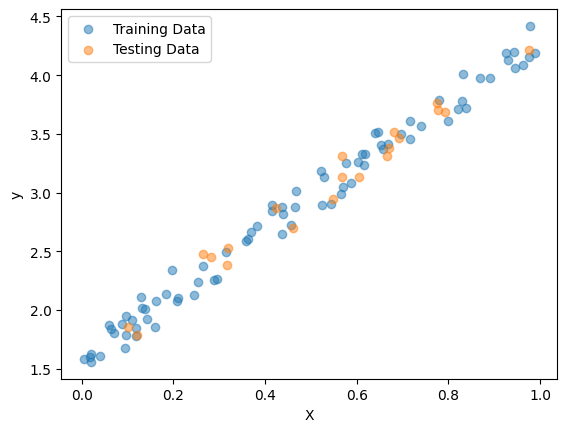

In [5]:
# generate data
X_train,y_train, X_test, y_test = generate_synthetic_data()

# plot the data
plot_data()

---

## 2. Explore the Family of Linear Models
From our plot, we notice that there seems to be a linear pattern: $y$ increases linearly with $x$. Hence, it might be suitable to use a **linear model** on the form:

$$
y=θ_0+θ_1x + ϵ
$$

We call $θ_0$ and $θ_1$ the **parameters** of our model. $ϵ$ is a noise term capturing random errors in our data that our model does not account for.

Finding a **good model** amount to fitting our model to the data. In other words, we want to find good values of $θ_0$ and $θ_1$, so that $y_i\approxθ_0+θ_1x_i$ holds for the samples in our training dataset $\mathcal{T}_{train} = \{x_i, y_i\}_{i=1}^{m}$. Here, $m$ denotes the number of samples in our train set, i.e. $m=80$.

Below is a helper function that plots some linear models. Skip over and go to the next box.

In [6]:
def plot_linear_models(
    X, y, label='Training',
    model1_params=[],
    model2_params=[],
    model3_params=[],
):
    # model 1
    if not all(element is None for element in model1_params):
        y_model1 = model1_params[0] + X * model1_params[1]
        plt.plot(X, y_model1, 'r', label='Model 1', alpha=0.5)

    # model 2
    if not all(element is None for element in model2_params):
        print('aaa')
        y_model2 = model2_params[0] + X * model2_params[1]
        plt.plot(X, y_model2, 'm', label='Model 2', alpha=0.5)

    # model 3
    if not all(element is None for element in model3_params):
        y_model3 = model3_params[0] + X * model3_params[1]
        plt.plot(X, y_model3, 'g', label='Model 3', alpha=0.5)

    # Plot the training data
    plt.scatter(X, y, label=label+' Data', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In this section we want to find a good linear model. We plot the training data, as well as the linear models (which are fully described by $θ_0$ and $θ_1$). If a model fits the data, we can use our parameters along with the inputs of the data (variable $\mathtt{X\_train}$) to calculate predicted y-values which are close to the true y-values.

Tasks:

1. Run the code below and visualize model 1 with the given parameters. Does it fit the data?
2. Try to optimize the parameters of model 2 and model 3 to obtain better fits to the data. Replace the $\mathtt{None}$ values with what you think are better parameters.
3. Which set of parameters fits the data the best?
4. What does $θ_0$ and $θ_1$ stand for?

aaa


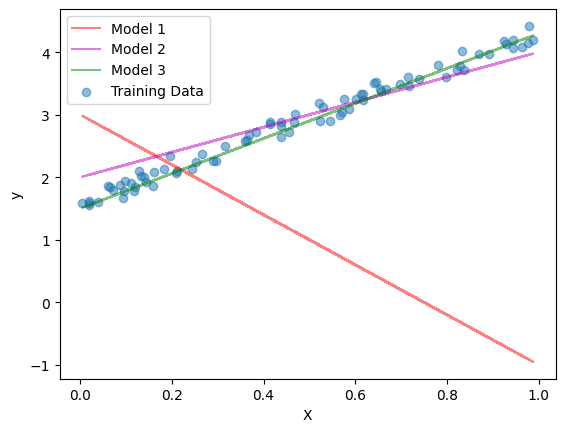

In [13]:
# model 1:
theta0 = 3
theta1 = -4
model1_params = [theta0, theta1]

# model 2
theta0 = 2
theta1 = 2
model2_params = [theta0, theta1]


# model 3:
theta0 = 1.5
theta1 = 2.8
model3_params = [theta0, theta1]

# plot model fits
plot_linear_models(X_train, y_train, 'Training',
                   model1_params, model2_params, model3_params)

---

## 3. Model evaluation

In the above exercise, you visually fit the linear model to the data. But how can we quantitatively determine which model is better? A common metric is the mean squared error (MSE):

$$
\frac{1}{m} \sum_{i=1}^{m} {(y_i - f_{\theta}(x_i))}^2
$$

Here, $y_i$ denotes the true value for each input $x_i$ in the train dataset, and $f_{\theta}(x_i) = \theta_0 + \theta_{1}x_i$ is the output of the model parameterized by our particular choice of $\theta_0$ and $\theta_1$.

Below you can find two helper functions computing the model predictions for a particular model as well as the mean squared error of that model on the given data points. Skip over and go to the next box.

In [14]:
def model_prediction(X, model_params):
    return model_params[0] + X * model_params[1]

def MSE(y, pred):
    m = len(y)
    return np.sum((y - pred)**2)/m

The following two code cells perform the following:
- Compare the MSE of the three models on the **train dataset**.
- Compare the MSE of the three models on the **test dataset** and plot the function with the test data.

Tasks:
1. Do you want to minimize or maximise MSE?
2. Given the train MSE, which model would you choose? Does this align with you visual impression from above?
3. Does the model generalize to unseen test data? Or more specifically: Does the MSE on train data and test data match?

In [15]:
print('MSE on train data')

pred1 = model_prediction(X_train, model1_params)
mse1 = MSE(y_train, pred1)
print(f'Model 1: {mse1:.3f}')

pred2 = model_prediction(X_train, model2_params)
mse2 = MSE(y_train, pred2)
print(f'Model 2: {mse2:.3f}')

pred3 = model_prediction(X_train, model3_params)
mse3 = MSE(y_train, pred3)
print(f'Model 3: {mse3:.3f}')

MSE on train data
Model 1: 6.832
Model 2: 0.062
Model 3: 0.014


aaa


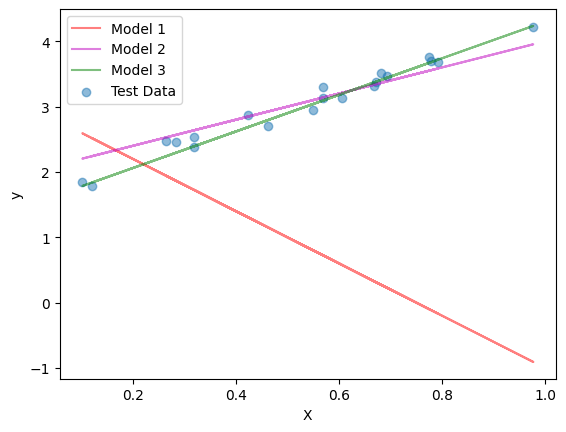

MSE on test data
Model 1: 7.046
Model 2: 0.035
Model 3: 0.012


In [16]:
plot_linear_models(X_test, y_test, 'Test',
                   model1_params, model2_params, model3_params)

print('MSE on test data')

pred1 = model_prediction(X_test, model1_params)
mse1 = MSE(y_test, pred1)
print(f'Model 1: {mse1:.3f}')

pred2 = model_prediction(X_test, model2_params)
mse2 = MSE(y_test, pred2)
print(f'Model 2: {mse2:.3f}')

pred3 = model_prediction(X_test, model3_params)
mse3 = MSE(y_test, pred3)
print(f'Model 3: {mse3:.3f}')

---

## 4. Finding the "optimal" linear model:

Now, as we have seen, we can not only fit a model by visual inspection but also select a model quantitatively by finding the model with the lowest MSE.

But is there a **systematic way** to select the model parameters $\theta_0$ and $\theta_1$? We define the "best possible linear model" as the model generating the smallest MSE. Finding the model parameters that minimize the MSE is equivalent to finding the parameters that minimize the squared L2-norm of the residual vector. Thus, to find the best linear model, we want to solve the following optimization problem with respect to $\theta=[\theta_0, \theta_1]^\top$:

$$
\hat{\mathbf{\theta}} = \text{arg}\min_{\mathbf{\theta}} \frac{1}{m} \sum_{i=1}^{m} {(y_i - f_{\theta}(x_i))}^2 = \text{arg}\min_{\mathbf{\theta}} ||{(\mathbf{y} - \mathbf{X}\mathbf{\theta})}||_2^2
$$

where
\begin{align*}
\mathbf{y} &= \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots\\
    y_m
\end{bmatrix}
& \mathbf{X} &= \begin{bmatrix}
    1 & x_1 \\
    1 & x_2 \\
    \vdots & \vdots \\
    1 & x_m
\end{bmatrix}
& \mathbf{θ} &= \begin{bmatrix}
    θ_0 \\
    θ_1 \\
\end{bmatrix}
\end{align*}

We use $\hat{\mathbf{\theta}}$ to denote our estimates of the true parameters.The solution to this optimization problem finds the least squares solution $\hat{\mathbf{\theta}}$ to the following (overdetermined) linear system of equations:

$$
\mathbf{y}=\mathbf{X}\mathbf{\theta}
$$


We say that we find the solution that minimizes the **least squares cost**. So when we say that our model is the **optimal** linear model, we mean that it is optimal in a least squares sense given the data.

When working with linear models, the optimization problem above has a closed-form solution that can be found by solving the normal equations for $\hat{\mathbf{\theta}}$:

$$
\mathbf{X}^T\mathbf{X}\hat{\mathbf{\theta}}=\mathbf{X}^T\mathbf{y}
$$

In the cell below, we solve the normal equations using our train data:


In [19]:
# construct the matrix X
n = len(X_train) # number of samples in our training data
X = np.ones((n, 2))
X[:,1] = X_train[:,0]

# solve the normal equations
theta_ls = np.linalg.inv(X.T@X)@(X.T@y_train)
print('Least Squares Solution:')
print(f'theta_0 = {theta_ls[0][0]}')
print(f'theta_1 = {theta_ls[1][0]}')

Least Squares Solution:
theta_0 = 1.5914303456660406
theta_1 = 2.716333648660024


Task:
1. Compare the optimal linear model with the best one that you found
2. What is the train and test MSE of this optimal model?

---

# Take-home message


*   Collect a dataset and split the dataset into a train set (for training your model) and a test set (for evaluating your model).
*   Define the model $f_{\theta}(x)$ you want to fit to the data. In the case of linear regression, we let $f_{\theta}(x)$ be the family of linear models parameterized by $\theta$.
* Choose an error metric and set up an optimization problem to find the optimal parameters $\theta$. Here, we choose the MSE.
* Solve the optimization problem using the train dataset.
* Evaluate your model on the test dataset.

**Recommendation for further reading:** The material covered in this notebook is well-covered in the beginning of Chapter 3.1 in the course book.


